In [1]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.features.generators import AutoMLPipelineFeatureGenerator, PipelineFeatureGenerator
from autogluon.features.generators import CategoryFeatureGenerator, IdentityFeatureGenerator
from autogluon.common.features.types import R_INT, R_FLOAT

import pandas as pd
import numpy as np
import random
from sklearn.datasets import make_regression
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [3]:
# Generate synthetic regression data
x, y = make_regression(n_samples=100, n_features=5, n_targets=1, random_state=1)

# Create DataFrames
dfx = pd.DataFrame(x, columns=['A', 'B', 'C', 'D', 'E'])
dfy = pd.DataFrame(y, columns=['label'])

# Column B: Convert to integer
dfx['B'] = (dfx['B']).astype(int)

# Column C: Convert to datetime
dfx['C'] = datetime(2000, 1, 1) + pd.to_timedelta(dfx['C'].astype(int), unit='D')

# Column D: Convert to categorical with labels
dfx['D'] = pd.cut(dfx['D'] * 10, [-np.inf, -5, 0, 5, np.inf], labels=['v', 'w', 'x', 'y'])

# Column E: Create random text strings
dfx['E'] = pd.Series([
    ' '.join(random.choice(["abc", "d", "ef", "ghi", "jkl"]) for i in range(4))
    for j in range(100)
])

# Display the dataset
print("="*70)
print("SAMPLE DATASET WITH MULTIPLE FEATURE TYPES")
print("="*70)
print("\nDataset shape:", dfx.shape)
print("\nFirst 10 rows:")
print(dfx.head(10))

print("\n" + "="*70)
print("DATA TYPES")
print("="*70)
print(dfx.dtypes)

print("\n" + "="*70)
print("BASIC STATISTICS")
print("="*70)
print(dfx.describe())

SAMPLE DATASET WITH MULTIPLE FEATURE TYPES

Dataset shape: (100, 5)

First 10 rows:
          A  B          C  D                E
0 -0.545774  0 2000-01-01  y    jkl ghi jkl d
1 -0.468674  0 2000-01-02  x   jkl ef abc ghi
2  1.767960  0 1999-12-31  v     d ef ghi jkl
3 -0.118771  1 2000-01-01  y      d abc ef ef
4  0.630196  0 1999-12-31  w       d ghi ef d
5  0.035360  0 2000-01-01  y  abc ghi jkl jkl
6  0.602319  0 2000-01-02  v    ef abc ghi ef
7 -0.200758  0 2000-01-01  w      ghi d d jkl
8 -0.822467  0 2000-01-01  v      d jkl d ghi
9 -2.060141  0 2000-01-02  y    d abc ghi ghi

DATA TYPES
A           float64
B             int64
C    datetime64[ns]
D          category
E            object
dtype: object

BASIC STATISTICS
                A           B                    C
count  100.000000  100.000000                  100
mean     0.021057    0.110000  2000-01-01 00:43:12
min     -2.434838   -2.000000  1999-12-30 00:00:00
25%     -0.626483    0.000000  2000-01-01 00:00:00
50%      0.

In [4]:
# Create the feature generator
auto_ml_pipeline_feature_generator = AutoMLPipelineFeatureGenerator()

# Transform the data
transformed_data = auto_ml_pipeline_feature_generator.fit_transform(X=dfx)

print("\n" + "="*70)
print("TRANSFORMED DATA")
print("="*70)
print("\nOriginal features:", dfx.shape[1])
print("Transformed features:", transformed_data.shape[1])
print("\nFirst 10 rows of transformed data:")
print(transformed_data.head(10))

print("\n" + "="*70)
print("NEW FEATURE COLUMNS")
print("="*70)
print("\nColumns in transformed data:")
for col in transformed_data.columns:
    print(f"  - {col}")


TRANSFORMED DATA

Original features: 5
Transformed features: 16

First 10 rows of transformed data:
          A  B  D    E                   C  C.year  C.month  C.day  \
0 -0.545774  0  3  NaN  946684800000000000    2000        1      1   
1 -0.468674  0  2  NaN  946771200000000000    2000        1      2   
2  1.767960  0  0  NaN  946598400000000000    1999       12     31   
3 -0.118771  1  3    4  946684800000000000    2000        1      1   
4  0.630196  0  1  NaN  946598400000000000    1999       12     31   
5  0.035360  0  3  NaN  946684800000000000    2000        1      1   
6  0.602319  0  0  NaN  946771200000000000    2000        1      2   
7 -0.200758  0  1  NaN  946684800000000000    2000        1      1   
8 -0.822467  0  0  NaN  946684800000000000    2000        1      1   
9 -2.060141  0  3    5  946771200000000000    2000        1      2   

   C.dayofweek  E.char_count  E.symbol_ratio.   __nlp__.abc  __nlp__.ef  \
0            5             5                 2       

In [5]:
# Combine features and labels
df = pd.concat([dfx, dfy], axis=1)

# Create a fresh feature generator for training
auto_ml_pipeline_feature_generator = AutoMLPipelineFeatureGenerator()

# Create and train predictor
print("="*70)
print("TRAINING MODEL WITH AUTOGLUON")
print("="*70)

predictor = TabularPredictor(label='label')
predictor.fit(
    df,
    hyperparameters={'GBM': {}},
    feature_generator=auto_ml_pipeline_feature_generator,
    time_limit=60  # 60 seconds training limit
)

print("\n✓ Model training complete!")

No path specified. Models will be saved in: "AutogluonModels/ag-20251026_192142"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Memory Avail:       11.59 GB / 12.67 GB (91.5%)
Disk Space Avail:   61.62 GB / 107.72 GB (57.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU memory.
	presets='

TRAINING MODEL WITH AUTOGLUON


Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "/content/AutogluonModels/ag-20251026_192142"
Train Data Rows:    100
Train Data Columns: 5
Label Column:       label
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (186.98105511749836, -267.99365510467214, 9.38193, 71.29287)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11818.88 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metad


✓ Model training complete!


In [6]:
print("Number of unique values in column B:", len(set(dfx['B'])))
print("Unique values:", sorted(dfx['B'].unique()))

# Even though B has few values, it wasn't detected as categorical
# Let's explicitly mark it as categorical
dfx["B"] = dfx["B"].astype("category")

print("\n✓ Column B marked as categorical")
print("\nNew data type for B:", dfx['B'].dtype)

Number of unique values in column B: 5
Unique values: [np.int64(-2), np.int64(-1), np.int64(0), np.int64(1), np.int64(2)]

✓ Column B marked as categorical

New data type for B: category


In [7]:
# Re-transform with B as categorical
auto_ml_pipeline_feature_generator = AutoMLPipelineFeatureGenerator()
transformed_data = auto_ml_pipeline_feature_generator.fit_transform(X=dfx)

print("\n" + "="*70)
print("TRANSFORMED DATA (with B as categorical)")
print("="*70)
print(transformed_data.head(10))

# Notice that B is now recognized as categorical in the feature types output

Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11302.20 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			Fitting DropDuplicatesFeatureGenerator...
		Fitting TextNgramFeatureGenerator...
			Fitting CountVectorizer for text features: ['E']
			CountVectorizer fit with vocabulary size = 4
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types o


TRANSFORMED DATA (with B as categorical)
          A  B  D    E                   C  C.year  C.month  C.day  \
0 -0.545774  1  3  NaN  946684800000000000    2000        1      1   
1 -0.468674  1  2  NaN  946771200000000000    2000        1      2   
2  1.767960  1  0  NaN  946598400000000000    1999       12     31   
3 -0.118771  2  3    4  946684800000000000    2000        1      1   
4  0.630196  1  1  NaN  946598400000000000    1999       12     31   
5  0.035360  1  3  NaN  946684800000000000    2000        1      1   
6  0.602319  1  0  NaN  946771200000000000    2000        1      2   
7 -0.200758  1  1  NaN  946684800000000000    2000        1      1   
8 -0.822467  1  0  NaN  946684800000000000    2000        1      1   
9 -2.060141  1  3    5  946771200000000000    2000        1      2   

   C.dayofweek  E.char_count  E.symbol_ratio.   __nlp__.abc  __nlp__.ef  \
0            5             5                 2            0           0   
1            6             6         

In [8]:
# Set first row to NaN
dfx.iloc[0] = np.nan

print("="*70)
print("DATASET WITH MISSING VALUES")
print("="*70)
print("\nFirst 5 rows (note the first row is all NaN):")
print(dfx.head())

DATASET WITH MISSING VALUES

First 5 rows (note the first row is all NaN):
          A    B          C    D               E
0       NaN  NaN        NaT  NaN             NaN
1 -0.468674    0 2000-01-02    x  jkl ef abc ghi
2  1.767960    0 1999-12-31    v    d ef ghi jkl
3 -0.118771    1 2000-01-01    y     d abc ef ef
4  0.630196    0 1999-12-31    w      d ghi ef d


In [9]:
# Transform with missing values
auto_ml_pipeline_feature_generator = AutoMLPipelineFeatureGenerator()
transformed_with_missing = auto_ml_pipeline_feature_generator.fit_transform(X=dfx)

print("\n" + "="*70)
print("TRANSFORMED DATA WITH MISSING VALUES")
print("="*70)
print("\nFirst 5 rows:")
print(transformed_with_missing.head())

print("\n" + "="*70)
print("MISSING VALUE HANDLING OBSERVATIONS")
print("="*70)
print("""
Key observations:
1. Float column 'A': NaN retained
2. Integer column 'B': NaN retained
3. Categorical column 'D': NaN retained
4. Text column 'E': NaN retained, text features set to 0
5. Datetime column 'C': NaN replaced with MEAN of non-NaN values!
   - This is a special behavior for datetime columns
""")

Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11301.71 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			Fitting DropDuplicatesFeatureGenerator...
		Fitting TextNgramFeatureGenerator...
			Fitting CountVectorizer for text features: ['E']
			CountVectorizer fit with vocabulary size = 4
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types o


TRANSFORMED DATA WITH MISSING VALUES

First 5 rows:
          A    B    D    E                   C  C.year  C.month  C.day  \
0       NaN  NaN  NaN  NaN  946687418181818240    2000        1      1   
1 -0.468674    1    2  NaN  946771200000000000    2000        1      2   
2  1.767960    1    0  NaN  946598400000000000    1999       12     31   
3 -0.118771    2    3    4  946684800000000000    2000        1      1   
4  0.630196    1    1  NaN  946598400000000000    1999       12     31   

   C.dayofweek  E.char_count  E.word_count  E.symbol_ratio.   __nlp__.abc  \
0            5             0             0                 0            0   
1            6             7             1                 2            1   
2            4             5             1                 4            0   
3            5             4             1                 5            1   
4            4             3             1                 6            0   

   __nlp__.ef  __nlp__.ghi  __nlp__.jkl

In [10]:
# Recreate data without missing values for this example
x, y = make_regression(n_samples=100, n_features=5, n_targets=1, random_state=1)
dfx = pd.DataFrame(x, columns=['A', 'B', 'C', 'D', 'E'])
dfx['B'] = (dfx['B']).astype(int)
dfx['C'] = datetime(2000, 1, 1) + pd.to_timedelta(dfx['C'].astype(int), unit='D')
dfx['D'] = pd.cut(dfx['D'] * 10, [-np.inf, -5, 0, 5, np.inf], labels=['v', 'w', 'x', 'y'])
dfx['E'] = pd.Series([
    ' '.join(random.choice(["abc", "d", "ef", "ghi", "jkl"]) for i in range(4))
    for j in range(100)
])

# Create custom pipeline
custom_pipeline = PipelineFeatureGenerator(
    generators=[[
        CategoryFeatureGenerator(maximum_num_cat=10),  # Limit to 10 categories max
        IdentityFeatureGenerator(infer_features_in_args=dict(valid_raw_types=[R_INT, R_FLOAT])),
    ]]
)

print("="*70)
print("CUSTOM FEATURE ENGINEERING PIPELINE")
print("="*70)
print("\nParameters:")
print("  - Maximum categories: 10")
print("  - Only keep numeric and categorical features")
print("  - No datetime or text processing")

# Transform with custom pipeline
custom_transformed = custom_pipeline.fit_transform(X=dfx)

print("\n" + "="*70)
print("CUSTOM TRANSFORMED DATA")
print("="*70)
print("\nFirst 10 rows:")
print(custom_transformed.head(10))

print("\n" + "="*70)
print("Note: Datetime column 'C' was dropped because we only kept numeric and categorical features!")
print("="*70)

Fitting PipelineFeatureGenerator...
	Available Memory:                    11273.13 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Unused Original Features (Count: 1): ['C']
		These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
		Features can also be unused if they carry very little information, such as being categorical but having almost entirely uniqu

CUSTOM FEATURE ENGINEERING PIPELINE

Parameters:
  - Maximum categories: 10
  - Only keep numeric and categorical features
  - No datetime or text processing

CUSTOM TRANSFORMED DATA

First 10 rows:
   D    E         A  B
0  3    0 -0.545774  0
1  2  NaN -0.468674  0
2  0  NaN  1.767960  0
3  3  NaN -0.118771  1
4  1  NaN  0.630196  0
5  3  NaN  0.035360  0
6  0  NaN  0.602319  0
7  1  NaN -0.200758  0
8  0  NaN -0.822467  0
9  3  NaN -2.060141  0

Note: Datetime column 'C' was dropped because we only kept numeric and categorical features!


In [11]:
# Load a real dataset from AutoGluon
from autogluon.tabular import TabularDataset

# Load adult income dataset
train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')

print("="*70)
print("ADULT INCOME DATASET")
print("="*70)
print(f"\nTrain data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

print("\nFirst 5 rows:")
print(train_data.head())

print("\n" + "="*70)
print("COLUMN INFORMATION")
print("="*70)
print("\nColumn types:")
print(train_data.dtypes)

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv | Columns = 15 / 15 | Rows = 39073 -> 39073
Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv | Columns = 15 / 15 | Rows = 9769 -> 9769


ADULT INCOME DATASET

Train data shape: (39073, 15)
Test data shape: (9769, 15)

First 5 rows:
   age   workclass  fnlwgt   education  education-num       marital-status  \
0   25     Private  178478   Bachelors             13        Never-married   
1   23   State-gov   61743     5th-6th              3        Never-married   
2   46     Private  376789     HS-grad              9        Never-married   
3   55           ?  200235     HS-grad              9   Married-civ-spouse   
4   36     Private  224541     7th-8th              4   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Tech-support       Own-child   White   Female             0   
1    Transport-moving   Not-in-family   White     Male             0   
2       Other-service   Not-in-family   White     Male             0   
3                   ?         Husband   White     Male             0   
4   Handlers-cleaners         Husband   White     Male             0   

   

In [12]:
# Train a model with automatic feature engineering
print("="*70)
print("TRAINING ON REAL DATASET")
print("="*70)

label = 'class'  # Target column
predictor = TabularPredictor(label=label, path='ag_models')

predictor.fit(
    train_data,
    time_limit=120,  # 2 minutes
    presets='medium_quality',
)

print("\n✓ Training complete!")

# Evaluate the model
print("\n" + "="*70)
print("MODEL EVALUATION")
print("="*70)
performance = predictor.evaluate(test_data)
print(f"\nTest accuracy: {performance}")

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Memory Avail:       10.99 GB / 12.67 GB (86.7%)
Disk Space Avail:   61.60 GB / 107.72 GB (57.2%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'


TRAINING ON REAL DATASET


Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "/content/ag_models"
Train Data Rows:    39073
Train Data Columns: 14
Label Column:       class
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' <=50K', ' >50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive ( >50K) vs negative ( <=50K) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeature


✓ Training complete!

MODEL EVALUATION

Test accuracy: {'accuracy': 0.8756269833145665, 'balanced_accuracy': np.float64(0.7992916389378104), 'mcc': np.float64(0.639682445135486), 'roc_auc': np.float64(0.9309127368696652), 'f1': 0.7139157052036732, 'precision': 0.7858994297563504, 'recall': 0.6540120793787748}


Computing feature importance via permutation shuffling for 14 features using 5000 rows with 5 shuffle sets...


FEATURE IMPORTANCE


	29.7s	= Expected runtime (5.94s per shuffle set)
	30.25s	= Actual runtime (Completed 5 of 5 shuffle sets)



Top 15 most important features:
                importance    stddev   p_value  n  p99_high   p99_low
capital-gain       0.04556  0.004075  0.000008  5  0.053951  0.037169
occupation         0.01768  0.003180  0.000120  5  0.024228  0.011132
age                0.01652  0.004242  0.000479  5  0.025254  0.007786
marital-status     0.01468  0.003714  0.000452  5  0.022327  0.007033
relationship       0.01420  0.004370  0.000953  5  0.023199  0.005201
education-num      0.01244  0.003948  0.001070  5  0.020569  0.004311
capital-loss       0.01168  0.001635  0.000045  5  0.015046  0.008314
hours-per-week     0.00640  0.002417  0.002037  5  0.011376  0.001424
workclass          0.00288  0.002500  0.030809  5  0.008028 -0.002268
fnlwgt             0.00220  0.001631  0.019654  5  0.005558 -0.001158
education          0.00184  0.002913  0.115372  5  0.007839 -0.004159
native-country     0.00120  0.001010  0.028288  5  0.003280 -0.000880
sex                0.00088  0.001016  0.062404  5  0.0029

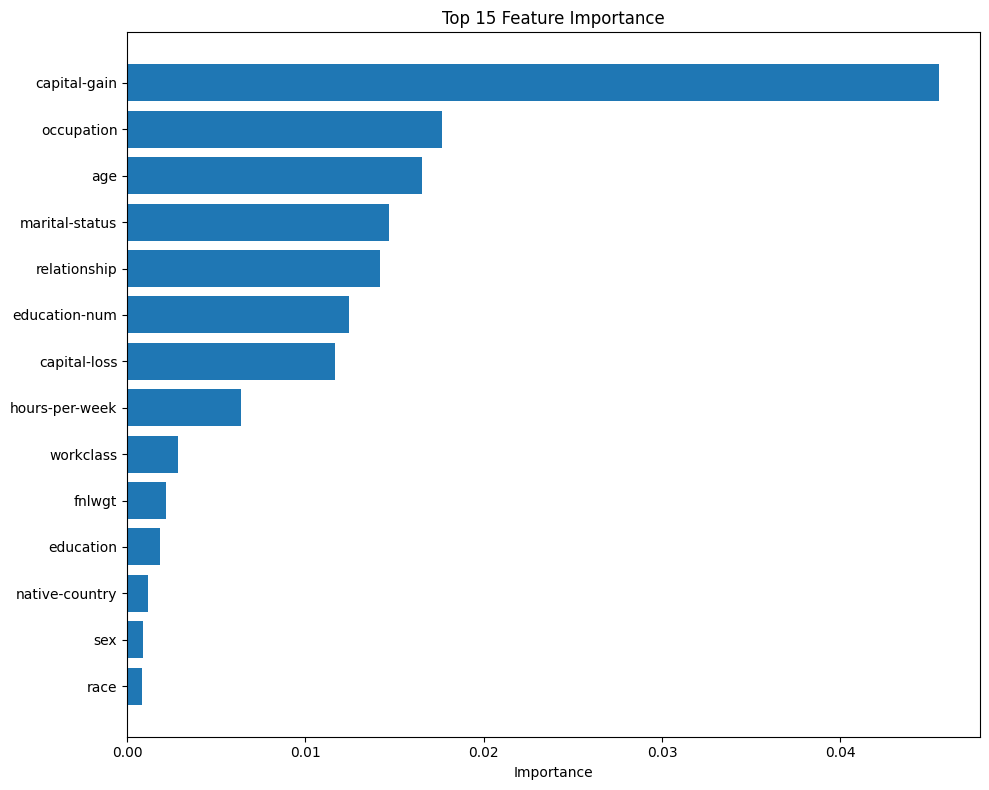

In [15]:
# Check feature importance
print("="*70)
print("FEATURE IMPORTANCE")
print("="*70)

feature_importance = predictor.feature_importance(test_data)
print("\nTop 15 most important features:")
print(feature_importance.head(15))

# Visualize feature importance
import matplotlib.pyplot as plt

top_features = feature_importance.head(15)
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features.index) # Corrected to use the DataFrame index
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [16]:
# View model leaderboard
print("="*70)
print("MODEL LEADERBOARD")
print("="*70)
leaderboard = predictor.leaderboard(test_data)
print(leaderboard)

MODEL LEADERBOARD
                 model  score_test  score_val eval_metric  pred_time_test  \
0             CatBoost    0.875627     0.8836    accuracy        0.031558   
1  WeightedEnsemble_L2    0.875627     0.8860    accuracy        0.776734   
2             LightGBM    0.873477     0.8824    accuracy        0.274650   
3           LightGBMXT    0.871430     0.8792    accuracy        0.467707   
4     RandomForestGini    0.859351     0.8612    accuracy        0.808148   
5     RandomForestEntr    0.857611     0.8584    accuracy        0.729632   
6      NeuralNetFastAI    0.856280     0.8572    accuracy        0.232495   
7       ExtraTreesGini    0.853414     0.8528    accuracy        0.874923   
8       ExtraTreesEntr    0.850650     0.8524    accuracy        1.276814   

   pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       0.010037  42.728891                 0.031558                0.010037   
1       0.189200  47.702439                 0.00281